<a href="https://colab.research.google.com/github/yas0019/yasmine-ML-Project2/blob/main/Project2_SMS_Spam_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1 What features indicate spam?**


1.   Presence of certain keywords like “win”, “free”, “prize”, “urgent”.
2.   Excessive punctuation or capital letters.
3.   Inclusion of URLs or phone numbers.
4.   Message length (very short or very long messages).
5.   Certain n-grams or frequent word patterns.


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Q2 How to clean and tokenize text?**

Steps for preprocessing SMS messages:

1. Lowercase conversion: “WINNER” → “winner”.
2. Remove punctuation & numbers.
3. Tokenization: Split text into words → “win a prize” → [“win”, “a”, “prize”].
4.  Remove stopwords: Common words like “is”, “the” are removed.
5.  Stemming/Lemmatization: Convert words to base form → “winning” → “win”.

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']]
df.rename(columns={'v1':'label','v2':'message'}, inplace=True)

df['label_num'] = df['label'].map({'ham':0,'spam':1})

Q3 What is TF-IDF?

1.  TF (Term Frequency): How often a word appears in a document.
2.  IDF (Inverse Document Frequency): Measures how rare a word is across all documents.
3.  TF-IDF: Combines both to assign weight to words important in a document but rare overall.

Purpose: Converts text into numeric features suitable for machine learning.

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_message'] = df['message'].apply(preprocess)

X = df['clean_message']
y = df['label_num']

**Q4 What is precision vs recall?**

Precision: Accuracy of predicted spam → How many predicted spam messages are truly spam.

Recall: Ability to detect all spam → How many actual spam messages were detected.

Trade-off: High precision may reduce recall and vice versa.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Q5 How to handle class imbalance?**

Class weighting:Give higher weight to minority class (spam).

**Resampling**:

**Oversampling**: Duplicate minority class examples.
**Undersampling**: Reduce majority class examples.

**SMOTE**: Synthetic Minority Oversampling Technique generates new samples.

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


**Q6 What is confusion matrix?**

* TP (True Positive): Correctly predicted spam.
* FP (False Positive): Ham predicted as spam.
* TN (True Negative): Correctly predicted ham.
* FN (False Negative): Spam predicted as ham.

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

**Q7 How to improve accuracy?**

* Better text preprocessing (remove noise, stemming).
* Use n-grams (bigrams, trigrams).
* Tune hyperparameters of Logistic Regression (C, solver).
* Use feature selection to reduce irrelevant words.
* Try ensemble methods if Logistic Regression is insufficient.

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[966   0]
 [ 35 114]]
Precision: 1.0
Recall: 0.7651006711409396
Accuracy: 0.968609865470852


**Q8 What are false positives?**

* Messages incorrectly labeled as spam when they are ham.
* Can lead to important messages being missed.

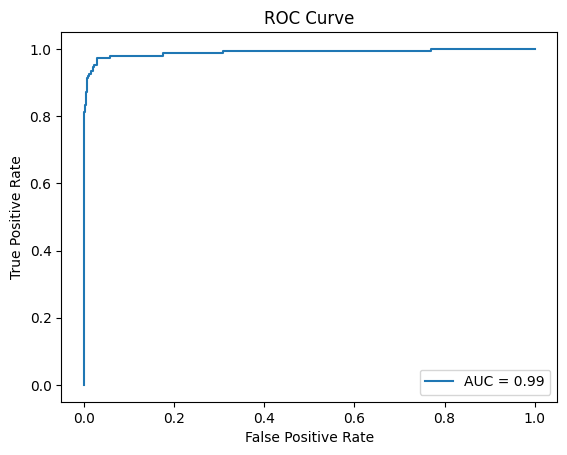

In [ ]:
y_prob = model.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Q9 How does logistic regression work?**

* Predicts probability of an outcome (spam = 1, ham = 0).
* Uses the sigmoid function to map input features to probability:

* Threshold (e.g., 0.5) decides classification.

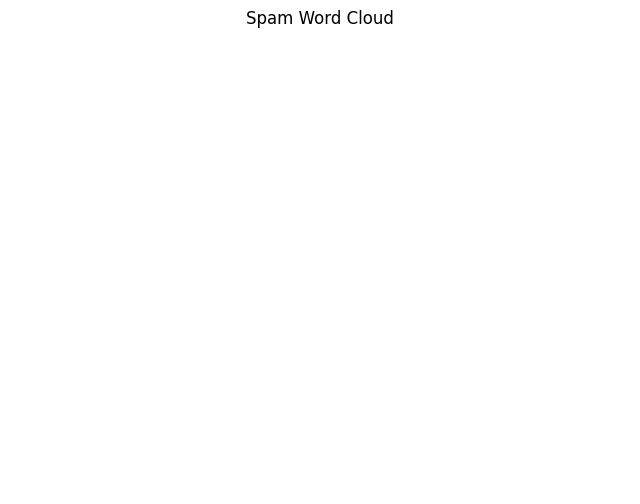

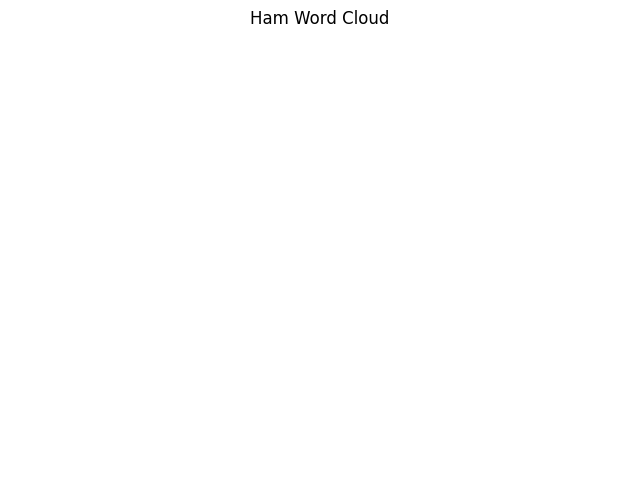

In [ ]:
spam_text = ' '.join(df[df['label']=='spam']['clean_message'])
ham_text = ' '.join(df[df['label']=='ham']['clean_message'])

plt.figure(figsize=(8,6))
WordCloud(width=600, height=400, background_color='white').generate(spam_text)
plt.title("Spam Word Cloud")
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6))
WordCloud(width=600, height=400, background_color='white').generate(ham_text)
plt.title("Ham Word Cloud")
plt.axis('off')
plt.show()


**Q10 How to visualize spam patterns?**

* **Word clouds:** Common words in spam vs ham.
* **Bar plots:** Frequency of top spam words.
* **Heatmaps:** Confusion matrix visualization.
* **Histograms:** Message length distributions.

In [ ]:
new_sms = ["Congratulations! You won a free ticket", "Hey, are we meeting today?"]
new_sms_clean = [preprocess(msg) for msg in new_sms]
new_sms_tfidf = tfidf.transform(new_sms_clean)
predictions = model.predict(new_sms_tfidf)

**Q11 How to split dataset into training and testing sets?**

1.  A dataset is divided into two parts:
     * Training set → Used to train the model (learn patterns).
     * Testing set → Used to check how well the model works on unseen data.
2. Common split: 80% training, 20% testing (or 70-30).
3. Purpose: Prevents overfitting (when the model memorizes training data but fails on new data).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model_cv = LogisticRegression()

scores = cross_val_score(model_cv, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.95964126 0.96076233 0.95622896 0.95398429 0.95173962]
Mean CV Accuracy: 0.9564712898793616


Q12

In [ ]:
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train_tfidf, y_train)

y_pred_bal = model_balanced.predict(X_test_tfidf)
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Balanced Model Precision:", precision_score(y_test, y_pred_bal))
print("Balanced Model Recall:", recall_score(y_test, y_pred_bal))


Balanced Model Accuracy: 0.9811659192825112
Balanced Model Precision: 0.9266666666666666
Balanced Model Recall: 0.9328859060402684


**Q13 How to evaluate model with ROC-AUC curve?**

1. ROC (Receiver Operating Characteristic) Curve:
    * A graph showing the trade-off between True Positive Rate (Recall) and False Positive Rate at different threshold values.

2. AUC (Area Under Curve):
     *  Measures the model’s ability to separate classes (spam vs ham).
     * AUC = 1.0 → Perfect classifier.
    * AUC = 0.5 → Random guessing.
3. **Use:** Helps compare models and choose the one that best distinguishes spam from ham.

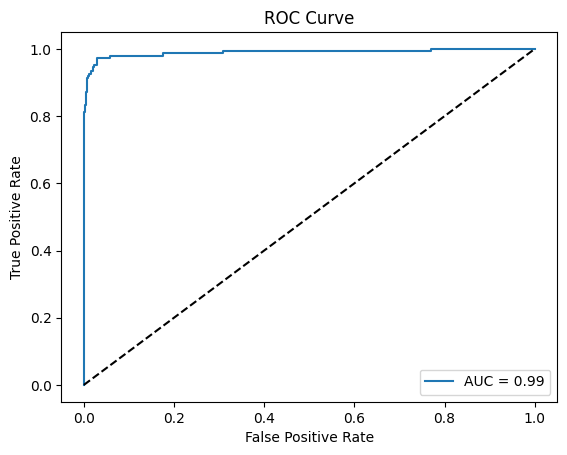

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Q14 Can you detect spam with deep learning instead of logistic regression?**

* Yes, deep learning can also detect spam.

**Examples:**

> LSTM / GRU (Recurrent Neural Networks): Good for sequential text like SMS.

> CNN (Convolutional Neural Networks): Can capture patterns in word sequences.

> Transformers (like BERT): Pretrained models that achieve very high accuracy in NLP tasks.



* Advantages: Better accuracy, can learn complex language patterns.
* Disadvantages: Needs more data, computing power, and time compared to logistic regression.

In [ ]:
new_sms = ["Win cash now!", "Are we meeting at 5 pm?"]
new_sms_clean = [preprocess(msg) for msg in new_sms]
new_sms_tfidf = tfidf.transform(new_sms_clean)

predictions = model.predict(new_sms_tfidf)
for msg, pred in zip(new_sms, predictions):
    print(f"Message: {msg} --> Prediction: {'Spam' if pred==1 else 'Ham'}")


Message: Win cash now! --> Prediction: Spam
Message: Are we meeting at 5 pm? --> Prediction: Ham


**Q15 How to deploy the spam detection model as a real-time SMS filter?**

Steps to deployment:

1. Train and save the model → Train with data, save using tools like joblib.
2. Create an API (using Flask or FastAPI): The API accepts SMS text and returns prediction (spam/ham).
3. Integrate with SMS system: Connect the API to a real SMS app or service provider.
4. Process new messages in real time: Each incoming SMS is preprocessed and passed to the model.
5. Action on prediction:
    * If spam → Block or move to spam folder.
    * If ham → Deliver to inbox.

In [ ]:
import joblib

joblib.dump(model, 'spam_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

loaded_model = joblib.load('spam_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

test_msg = ["Congratulations! You won a prize!"]
test_msg_clean = [preprocess(msg) for msg in test_msg]
test_msg_tfidf = loaded_tfidf.transform(test_msg_clean)
print(loaded_model.predict(test_msg_tfidf))

[0]
